# Analysis of Doppler Evolution of Neutron Star Spin Period in Cen X-3

In this Jupyter notebook, we will analyze the Doppler evolution of the neutron star (NS) spin period in the system Cen X-3. This evolution is caused by the orbital movement of the neutron star around its companion star.

### Objectives
1. Use a sliding window method to observe changes in the NS spin period.
2. Constrain the orbital parameters using the `fit_orbit_ps` function.

### Data
The lightcurve data required for this analysis is compressed and stored in the following files:
- `cenx3_chandra.zip`
- `cenx3_xmm.zip`

### Method
1. **Sliding Window Analysis**:
    - Apply the `period_sliding_window` function to observe the Doppler shifts in the NS spin period.
    - Note that the results from this function might need to be filtered to obtain the desired accuracy.

2. **Orbital Parameter Fitting**:
    - Use the observed data to constrain the orbital parameters with the `fit_orbit_ps` function.
    - The fitting process will be guided by predefined boundaries to ensure accurate execution.

### Notes
- Ensure that you have the necessary lightcurve files extracted and accessible within your working directory.
- The results from the sliding window method might need further refinement through filtering to achieve the best results.


In [1]:
##DOPPLER PAKG EXAMPLES
import ast

import sys
sys.path.append('/Users/graci/Desktop')
import random

import xraybinaryorbit
from xraybinaryorbit import *


HELLO, nice to see you! :)

PLEASE READ THIS, IT'S VERY IMPORTANT:

These are the units that must be used within this package:

- Rstar: Solar radius
- Mstar: Solar masses
- Inclination: Sexagesimal degrees
- Periapsis: Sexagesimal degrees
- Semimajor: Stellar radius
- Periods: Days (Periods in the case of the period_sliding_window function will support any units)
- Iphase: Radians

A list of the functions contained in this package will be displayed by runing the function list_functions().

As these functions use a lot of parameters, which can sometimes be difficult to handle, we have implemented a user-friendly method for parameter input:
A form will be displayed, and the parameters will be saved in the directory for further interactions. These saved parameters will be used if new parameters are not provided.
For the function to work, the submit button must be pressed.

Please, take into account that fits in general will take A LOT of time to complete.

If you need help, contact grac

In [6]:
lc_chandra = pd.read_csv("cenx3_chandra_lc", sep='\s+', skiprows=350, header= None)
lc_xmm = pd.read_csv("cenx3_xmm_lc.txt", sep='\s+', skiprows=350, header= None)

In [7]:
periods_chandra = period_sliding_window(lc_chandra[0], lc_chandra[1], lc_chandra[2], 3000, 100, max_period=5, min_period=4, false_alarm_threshold=0.00001, rel_high_for_error=0.9, folded_pulses= False, snr_pulse=0.2, nbin_pulse=None)


    Performs period analysis using a sliding window approach on a lightcurve dataset.

    Parameters:
    - t: Time array of the lightcurve.
    - c: Count rate or flux array corresponding to the time array.
    - sc: Errors (standard deviation) associated with the count rate or flux.
    - window_sec: Size of the sliding window in seconds for period analysis.
    - step_sec: Step size in seconds between consecutive windows.
    - max_period: Maximum period to consider in the periodogram analysis (optional).
    - min_period: Minimum period to consider in the periodogram analysis (optional).
    - false_alarm_threshold: Threshold value for false alarm probability in Lomb-Scargle periodogram.
    - rel_high_for_error: Relative height for error estimation in peak_widths function.
    - folded_pulses: If True, folds the lightcurve using `fold_pulse` for each identified period.
    - snr_pulse: Minimum signal-to-noise ratio threshold for folding using `fold_pulse`.
    - nbin_pulse: Numb

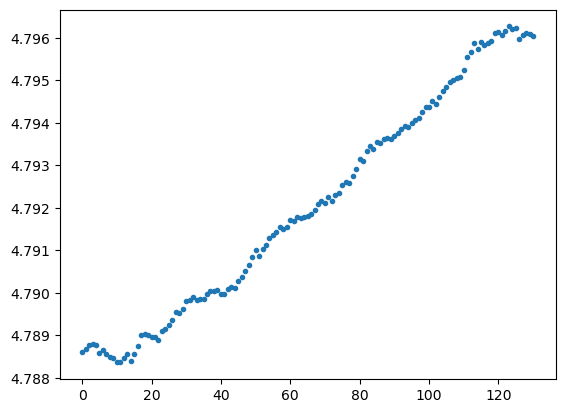

In [8]:
p_chandra = periods_chandra[0]
plt.plot(p_chandra.Period,".")

In [9]:
periods_xmm = period_sliding_window(lc_xmm[0], lc_xmm[1], lc_xmm[2],3000, 100, max_period=5, min_period=4, false_alarm_threshold=0.00001, rel_high_for_error=0.9, folded_pulses= False, snr_pulse=0.2, nbin_pulse=None)


    Performs period analysis using a sliding window approach on a lightcurve dataset.

    Parameters:
    - t: Time array of the lightcurve.
    - c: Count rate or flux array corresponding to the time array.
    - sc: Errors (standard deviation) associated with the count rate or flux.
    - window_sec: Size of the sliding window in seconds for period analysis.
    - step_sec: Step size in seconds between consecutive windows.
    - max_period: Maximum period to consider in the periodogram analysis (optional).
    - min_period: Minimum period to consider in the periodogram analysis (optional).
    - false_alarm_threshold: Threshold value for false alarm probability in Lomb-Scargle periodogram.
    - rel_high_for_error: Relative height for error estimation in peak_widths function.
    - folded_pulses: If True, folds the lightcurve using `fold_pulse` for each identified period.
    - snr_pulse: Minimum signal-to-noise ratio threshold for folding using `fold_pulse`.
    - nbin_pulse: Numb

,min_time,max_time,Frequency,Period,Power,Freq:Error,Period_Error,Power_Error,False_alarm
0,2.665387e+08,2.665393e+08,0.208389,4.798707,0.288115,623.542547,0.001604,0.028824,1.278467e-216
1,2.665388e+08,2.665394e+08,0.208376,4.799014,0.285400,626.468003,0.001596,0.028541,3.813682e-214
2,2.665388e+08,2.665394e+08,0.208381,4.798899,0.279263,634.952443,0.001575,0.027927,1.376161e-208
3,2.665388e+08,2.665394e+08,0.208393,4.798630,0.277588,634.139339,0.001577,0.027890,4.442424e-207
5,2.665388e+08,2.665394e+08,0.208388,4.798746,0.279367,629.077161,0.001590,0.027958,1.109279e-208
...,...,...,...,...,...,...,...,...,...
5204,2.666176e+08,2.666182e+08,0.207819,4.811883,0.171263,572.308285,0.001747,0.017140,7.541556e-118
5206,2.666177e+08,2.666183e+08,0.207839,4.811421,0.166431,580.850261,0.001722,0.016645,4.506099e-114
5208,2.666177e+08,2.666183e+08,0.207819,4.811883,0.167038,582.793055,0.001716,0.016793,1.514074e-114
5210,2.666177e+08,2.666183e+08,0.207807,4.812153,0.165460,593.481952,0.001685,0.016574,2.566129e-113


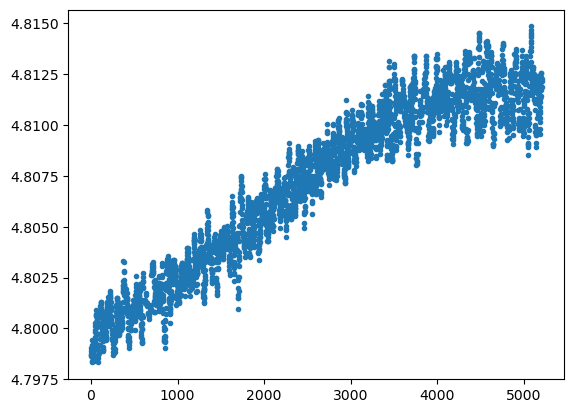

In [6]:
p_xmm = periods_xmm[0]
p_xmm = p_xmm[p_xmm["False_alarm"]<1e-50]

plt.plot(p_xmm.Period,".")
p_xmm

In [7]:
chandra_results, chandra_ph, chandra_predicted_data, chandra_rsq =fit_orbit_ps((p_chandra.min_time+p_chandra.min_time)/2, p_chandra.Period, y_err=0, num_iterations=100, maxiter = 1000, swarmsize = 100,units="s",method_="discrete",extended_binsize=0.01)


    fit_orbit_ps fits observed orbital modulation data by estimating parameters such as phase, semi-major axis, orbital period, eccentricity, inclination, and periapsis.

    The fitting process utilizes a particle swarm optimization (PSO) algorithm, which iteratively improves parameter estimates by minimizing the chi-squared difference between observed and predicted data.

    The function can handle two fitting methods:

    - Discrete: Suitable for discrete data points (e.g., spectra with small orbital phase ranges, faster).
    - Extended: Suitable for data with varying or extended bin sizes, typical with current instrument resolutions (e.g., XMM-Newton and Chandra) and short X-ray binary (XRB) orbits.

    Inputs:
    - x_data: Time bins of the observed data.
    - y_data: Observed data points corresponding to each time bin.
    - y_err: Error associated with each observed data point (default is 0).
    - num_iterations: Number of iterations for PSO optimization (default is 3).
 

In [ ]:
xmm_results, xmm_ph, xmm_predicted_data, xmm_rsq = fit_orbit_ps((p_xmm.min_time+p_xmm.min_time)/2, p_xmm.Period, y_err=0, num_iterations=100, maxiter = 1000, swarmsize = 100, units="s",method_="discrete",extended_binsize=0.01)

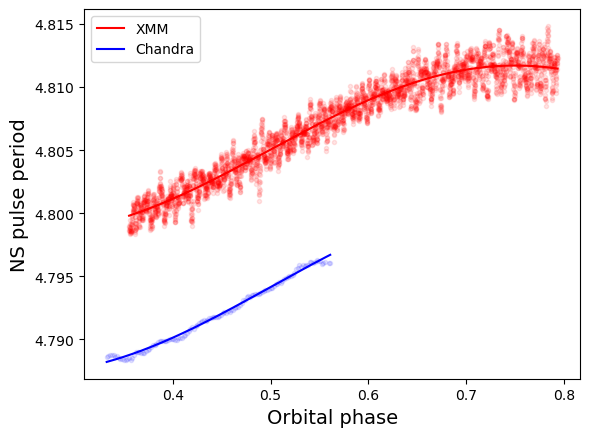

In [21]:
plt.plot(xmm_ph, xmm_predicted_data,"r", label="XMM")
plt.plot(chandra_ph, chandra_predicted_data,"b", label="Chandra")

plt.plot(xmm_ph, p_xmm.Period,"r.",alpha=0.1)
plt.plot(chandra_ph, p_chandra.Period,"b.",alpha=0.1)

plt.xlabel("Orbital phase", fontsize=14)
plt.ylabel("NS pulse period", fontsize=14)
plt.legend()
plt.savefig("doppler_new.png")

In [30]:
xmm_results

Name of the parameter,iphase,semimajor,orbitalperiod,eccentricity,periapsis,inclination,Rstar,Mstar1,Mstar2,wind_vel,feature
Value,0.182680,1.565927,2.087544,7.461499e-07,2.909752e-07,71.864484,12.342031,19.626791,1.444250,6.605339e-11,4.805056
Std,0.246851,0.023834,0.000268,2.629001e-07,2.578167e-07,2.639510,0.203145,0.770703,0.102614,2.685268e-11,0.000157


In [31]:
chandra_results

Name of the parameter,iphase,semimajor,orbitalperiod,eccentricity,periapsis,inclination,Rstar,Mstar1,Mstar2,wind_vel,feature
Value,0.171239,1.579440,2.087685,2.205680e-07,7.917843e-07,74.437452,12.438373,20.145706,1.502922,5.356303e-11,4.794156
Std,0.250043,0.024185,0.000273,2.559882e-07,2.562656e-07,2.784235,0.242362,0.817687,0.105544,2.620002e-11,0.000410


In [43]:
pwd

'/Users/graci/Desktop/CENX3CHANDRA/NS_PULSE'

In [33]:
chandra_ph

array([0.33247888, 0.3342377 , 0.33599763, 0.33773871, 0.3394809 ,
       0.34122198, 0.3429808 , 0.34477511, 0.34651729, 0.34825837,
       0.35000056, 0.35174163, 0.35350045, 0.35526038, 0.35700146,
       0.35874365, 0.36048473, 0.36222691, 0.36398573, 0.36572681,
       0.367469  , 0.36921007, 0.37095226, 0.37269334, 0.37443552,
       0.37617771, 0.37791879, 0.37966098, 0.38140205, 0.38314424,
       0.38488532, 0.3866275 , 0.38836858, 0.39011077, 0.39185184,
       0.39359403, 0.39533511, 0.39707729, 0.39881837, 0.4005783 ,
       0.40231938, 0.40406156, 0.40580264, 0.40754483, 0.40928591,
       0.41102809, 0.41276917, 0.41452799, 0.41628792, 0.418029  ,
       0.41977118, 0.42151226, 0.42325445, 0.42499552, 0.42673771,
       0.42847879, 0.43022097, 0.43196205, 0.43370424, 0.43544531,
       0.4371875 , 0.43892969, 0.44067076, 0.44241295, 0.44415403,
       0.44589621, 0.44763729, 0.44937947, 0.45112055, 0.45286274,
       0.45460381, 0.456346  , 0.45808708, 0.45982926, 0.46157

In [42]:
pwd

'/Users/graci/Desktop/CENX3CHANDRA/NS_PULSE'